# DATA CLEANING, TRANSFORMATION & EXPLORATION


In [1]:
#Libraries used for the exploratory analylis of the data

import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sbn

%matplotlib inline

Opening the file of the Air indexes and the file of the weather metrics to verify the completness and correctness of the data

## AIR QUALITY MEASUREMENT REFERENCE FILE


### AIR QUALITY DATA DICTIONARY

Data is gather in real time by different stations locations across several areas in Madrid city. Data is storage in multiple files, but they were consolidated in only one reference file. (This is explained in notebook "1a_Extract_Concat_AirQ_measurements.ipynb")
 The study will use ".csv", which follow this data structure

PROVINCIA | MUNICIPIO | ESTACION | MAGNITUD | PUNTO DE MUESTREO | AÑO | MES | DIA | Hxx (dato horario) | Vxx (código de validacion)
:--------: | ------- | ------- | ------- | ------- | ------- | ------- | ------- | ------- | ------- 
28 | 079 | 004 | 01 | 28079004_1_38| 17 |07 | 01| 00005 | V 


**PROVINCIA.** Spanish province where the study is located. 28 belongs to Madrid

**MUNICIPIO.** Municipality where the study is located. 079 belongs to Madrid city

**ESTACION.** Measuring station. In Madrid there are 24 stations across all the districts.

**MAGNITUD.** Every station measure different parameters related to air quality. __This study will only need Magnitud related to Monoxido de Nitrogeno, NO2 that is represented as Magnitud = "08".__

**PUNTO DE MUESTREO.** This is a code including the station id (including provincia, municipio y estacion), and adding the "magnitud" and "tecnica de muestreo".

**Hxx (dato horario).** Data value per hour.

**Vxx (codigo de validacion).** Flag to identify the valid measurements, filtering out others that may have some issue during the measurement process. So, __the only valid values have a "V" in this field.__

**H01/VO1, H02/V02.** There are 48 extra columns related to hour (H01 = 1:00 am, H02 = 2:00 am..) and validation (V01 = data flag related to the data aat 1:00 am...). NOTE. For practical reason in the analyis the representation of the hours have been modified 1 second, just to allow reference the H24 to the same date. This is just matter of data representation not altering any result in the analysis.

### CLEANING & TRANSFORMATION AIR QUALITY DATA

In [2]:
#Creating dataframe with all data from the reference AirQuality file.

air_index = pd.read_csv ("../data/interim/AirQuality/ref_air_quality.csv", sep= ',')

In [3]:
air_index.head()


,Unnamed: 0,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,...,V20,H21,V21,H22,V22,H23,V23,H24,V24,source_file
0,0,28,79,4,1,28079004_1_38,2019,4,1,4.0,...,V,2.0,V,4.0,V,4.0,V,4.0,V,abr_mo19.csv
1,1,28,79,4,1,28079004_1_38,2019,4,2,3.0,...,V,4.0,V,4.0,V,4.0,V,4.0,V,abr_mo19.csv
2,2,28,79,4,1,28079004_1_38,2019,4,3,3.0,...,V,5.0,V,5.0,V,5.0,V,4.0,V,abr_mo19.csv
3,3,28,79,4,1,28079004_1_38,2019,4,4,4.0,...,V,4.0,V,4.0,V,3.0,V,4.0,V,abr_mo19.csv
4,4,28,79,4,1,28079004_1_38,2019,4,5,4.0,...,V,2.0,V,2.0,V,1.0,V,1.0,V,abr_mo19.csv


Checking null values in the different fields and rows. 

In [4]:
air_index.isnull().sum()

Unnamed: 0        0
PROVINCIA         0
MUNICIPIO         0
ESTACION          0
MAGNITUD          0
PUNTO_MUESTREO    0
ANO               0
MES               0
DIA               0
H01               0
V01               0
H02               0
V02               0
H03               0
V03               0
H04               0
V04               0
H05               0
V05               0
H06               0
V06               0
H07               0
V07               0
H08               0
V08               0
H09               0
V09               0
H10               0
V10               0
H11               0
V11               0
H12               0
V12               0
H13               0
V13               0
H14               0
V14               0
H15               0
V15               0
H16               0
V16               0
H17               0
V17               0
H18               0
V18               0
H19               0
V19               0
H20               0
V20               0
H21               0


**CONCLUSION:No NaNs in the data**

"Vxx" fields can contain N, what means that value related to that hour is not valid. So, as part of the cleaning and data transformation a deeper analysis will be needed to take a decision about the relevance of those values and impact in the final predicion, just to decide to clean this data from all stations or not.

In [4]:
#Checking volumes of not valid measurements(with N in Vxx fields)
air_index_matrix= air_index[['V01','V02','V03','V04','V05','V06','V07','V08','V09','V10','V11','V12','V13','V14', 'V15','V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24']].apply(pd.Series.value_counts)

In [5]:
air_index_transpose = air_index_matrix.transpose()
air_index_transpose

,V,N
V01,141745,1231
V02,141725,1251
V03,141313,1663
V04,141728,1248
V05,141694,1282
V06,141675,1301
V07,141604,1372
V08,141402,1574
V09,140833,2143
V10,139949,3027


In [6]:
air_index_transpose.sum()

V    3382952
N      48472
dtype: int64

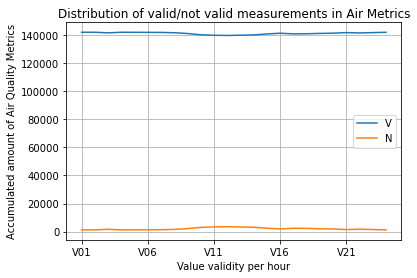

In [7]:
air_index_transpose.plot()
plt.ylabel("Accumulated amount of Air Quality Metrics");
plt.xlabel("Value validity per hour");
plt.title("Distribution of valid/not valid measurements in Air Metrics");
plt.grid(True);

**CONCLUSION: Not valid values are less than 1%, so the potential impact in the models should not be relevant. During next iterations this will be re-evaluated**

The scope of the study is only based on NO2 index, so the values related to ther indexes in the field "MAGNITUD" should be ignored (not only in the POC, from full study)

In [8]:
#Selecting only NO2 metric
air_index8 = air_index[(air_index['MAGNITUD'] == 8)]

The current data structure is not optimal for the analyis, so different transformation steps are going to be done.

1. Creation of TimeStamp just looking to simplify the data structure to something better to read. This is done with the function "to_datetime", concatenating the 3 fields in the original data in a date.https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

In [9]:
# Creation of a "DATE" field with the concatenation of ANO, MES & DIA
air_index8 ['DATE'] = pd.to_datetime({'year': air_index8['ANO'],
                                                          'month': air_index8['MES'],
                                                          'day': air_index8['DIA']})

<ipython-input-9-3479c0d76be1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_index8 ['DATE'] = pd.to_datetime({'year': air_index8['ANO'],


2. Hour information is storage in multiple columns, one per hour. This is not practical to manage the dataset, so a second transformation step has been done using "wide to long" concept, using "melt" function from pandas. This function is useful to massage a DataFrame into a format where one or more columns are identifier variables (id_vars), while all other columns, considered measured variables (value_vars), are “unpivoted” to the row axis, leaving just two non-identifier columns, ‘variable’ and ‘value’
https://pandas.pydata.org/docs/reference/api/pandas.melt.html#pandas.melt

In [10]:
# Dataframe transformation, keeping needed data and creating measured variables originally in columns

air_index8 = pd.melt(air_index8, id_vars=['ESTACION', 'MAGNITUD', 'PUNTO_MUESTREO','DATE'], value_vars=['H01', 'H02', 'H03', 'H04', 'H05',
                                                                                                'H06', 'H07', 'H08', 'H09', 'H10',
                                                                                                'H11', 'H12', 'H13', 'H14', 'H15',
                                                                                                'H16', 'H17', 'H18', 'H19', 'H20',
                                                                                                'H21', 'H22', 'H23', 'H24'])

3. Stil data require some other transformation to allow us manipulate and visualize it properly, it requires to transform the "variables" from columns created with melt function together with the date to create a Timestamp field, what will facilitate us the data manipulation.

In [12]:
#Creation of HORA field based on the hourly columns manipulated with melt funcion and now storage in "variable" field
air_index8['HORA'] = [int(x[1:3]) for x in air_index8.variable.values]

4. Creation of Timestamp and indexing

In [13]:
#Creation of timestamp field & indexing time
air_index8['TIME'] = air_index8['DATE'].astype(str) + ' ' + (air_index8['HORA']-1).astype(str) + ':59:59'
air_index8['TIME']=pd.to_datetime(air_index8['TIME'] )
air_index8.index = air_index8.TIME

5. Cleaning not needed columns and rename other columns to more intuitive name.

ESTACION = AIR_STATION_ID. Air Measuring station id. In Madrid there are 24 stations across all the districts.

PUNTO_MUESTREO = AIR_METRIC_POINT. This is a code including the Air Station id (including provincia, municipio y estacion), and adding the "magnitud" and "tecnica de muestreo"

In [14]:
#Cleaning dataframe
air_index8.rename(columns={'value':'NO2_index'},inplace=True)
air_index8.rename(columns={'ESTACION':'AIR_STATION_ID'},inplace=True)
air_index8.drop(['variable'], axis = 'columns', inplace=True)
air_index8.drop(['MAGNITUD'], axis = 'columns', inplace=True)
air_index8.drop(['PUNTO_MUESTREO'], axis = 'columns', inplace=True)

In [15]:
air_index8

,AIR_STATION_ID,AIR_METRIC_POINT,DATE,NO2_index,HORA,TIME
TIME,,,,,,
2019-04-01 00:59:59,4,28079004_8_8,2019-04-01,17.0,1,2019-04-01 00:59:59
2019-04-02 00:59:59,4,28079004_8_8,2019-04-02,22.0,1,2019-04-02 00:59:59
2019-04-03 00:59:59,4,28079004_8_8,2019-04-03,33.0,1,2019-04-03 00:59:59
2019-04-04 00:59:59,4,28079004_8_8,2019-04-04,20.0,1,2019-04-04 00:59:59
2019-04-05 00:59:59,4,28079004_8_8,2019-04-05,22.0,1,2019-04-05 00:59:59
...,...,...,...,...,...,...
2021-06-26 23:59:59,60,28079060_8_8,2021-06-26,25.0,24,2021-06-26 23:59:59
2021-06-27 23:59:59,60,28079060_8_8,2021-06-27,14.0,24,2021-06-27 23:59:59
2021-06-28 23:59:59,60,28079060_8_8,2021-06-28,18.0,24,2021-06-28 23:59:59


**TRANSFORMATION AIR QUALITY DATA - CODE SUMMARY**

In [3]:
#Selecting only NO2 metric
air_index8 = air_index[(air_index['MAGNITUD'] == 8)]

#Creation of a "DATE" field with the concatenation of ANO, MES & DIA
air_index8 ['DATE'] = pd.to_datetime({'year': air_index8['ANO'],
                                                          'month': air_index8['MES'],
                                                          'day': air_index8['DIA']})

#Dataframe transformation, keeping the needed data and creating measured variables originally in columns
air_index8 = pd.melt(air_index8, id_vars=['ESTACION', 'MAGNITUD', 'PUNTO_MUESTREO','DATE'], value_vars=['H01', 'H02', 'H03', 'H04', 'H05',
                                                                                                'H06', 'H07', 'H08', 'H09', 'H10',
                                                                                                'H11', 'H12', 'H13', 'H14', 'H15',
                                                                                                'H16', 'H17', 'H18', 'H19', 'H20',
                                                                                                'H21', 'H22', 'H23', 'H24'])

#Creation of HORA field based on the hourly columns manipulated with melt funcion and now storage in "variable" field
air_index8['HORA'] = [int(x[1:3]) for x in air_index8.variable.values]

#Creation of timestamp field & indexing time
air_index8['TIME'] = air_index8['DATE'].astype(str) + ' ' + (air_index8['HORA']-1).astype(str) + ':59:59'
air_index8['TIME']=pd.to_datetime(air_index8['TIME'] )
air_index8.index = air_index8.TIME

#Cleaning dataframe
air_index8.rename(columns={'value':'NO2_index'},inplace=True)
air_index8.rename(columns={'ESTACION':'AIR_STATION_ID'},inplace=True)
air_index8.drop(['variable'], axis = 'columns', inplace=True)
air_index8.drop(['MAGNITUD'], axis = 'columns', inplace=True)
air_index8.drop(['PUNTO_MUESTREO'], axis = 'columns', inplace=True)


<ipython-input-3-79fd785710df>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_index8 ['DATE'] = pd.to_datetime({'year': air_index8['ANO'],


In [4]:
air_index8.head()

,AIR_STATION_ID,DATE,NO2_index,HORA,TIME
TIME,,,,,
2019-04-01 00:59:59,4,2019-04-01,17.0,1,2019-04-01 00:59:59
2019-04-02 00:59:59,4,2019-04-02,22.0,1,2019-04-02 00:59:59
2019-04-03 00:59:59,4,2019-04-03,33.0,1,2019-04-03 00:59:59
2019-04-04 00:59:59,4,2019-04-04,20.0,1,2019-04-04 00:59:59
2019-04-05 00:59:59,4,2019-04-05,22.0,1,2019-04-05 00:59:59


### AIR QUALITY DATA EXPLORATORY

In this step, analysis of the data will be done to start knowing the data, the gaps, anomalyies, trends...

In [6]:
air_index8.groupby([air_index8['TIME'].dt.weekday, "AIR_STATION_ID"])["NO2_index"].mean()

TIME  AIR_STATION_ID
0     4                 35.017949
      8                 41.816483
      11                35.522482
      16                29.103717
      17                34.668465
                          ...    
6     56                35.092693
      57                20.121103
      58                10.936751
      59                16.784367
      60                20.204736
Name: NO2_index, Length: 168, dtype: float64

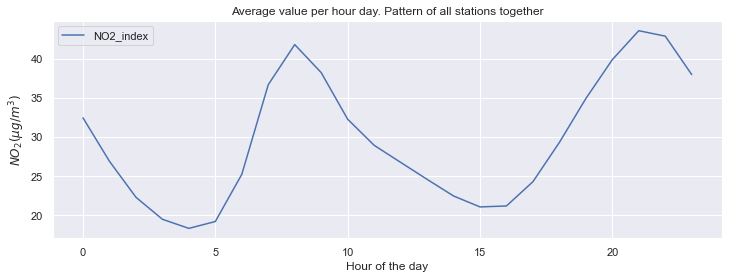

In [36]:
#Average value per hour day. Pattern of all stations together
mean2019 = air_index8.loc["2019"]
mean2020 = air_index8.loc["2020"]
mean2021 = air_index8.loc["2021"]

fig, axs = plt.subplots(figsize=(12, 4))
air_index8.groupby(air_index8["TIME"].dt.hour)["NO2_index"].mean().plot(kind='line', rot=0, ax=axs)
#mean2019.groupby(mean2019["TIME"].dt.hour)["NO2_index"].mean().plot(kind='line', rot=0, ax=axs)
#mean2020.groupby(mean2020["TIME"].dt.hour)["NO2_index"].mean().plot(kind='line', rot=0, ax=axs)
#mean2021.groupby(mean2021["TIME"].dt.hour)["NO2_index"].mean().plot(kind='line', rot=0, ax=axs)
plt.xlabel("Hour of the day");
plt.ylabel("$NO_2 (µg/m^3)$");
plt.title("Average value per hour day. Pattern of all stations together");
plt.legend()

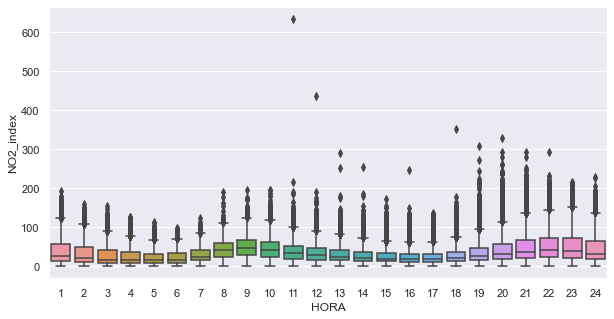

In [11]:
# N02 distribution  for each hour day
sbn.set(rc={'figure.figsize':(10, 5)})
sbn.boxplot(data=air_index8.loc['2019'], x='HORA', y='NO2_index');

### AIR QUALITY POC DATA


The analysis will start with a MVP analysis for 1 station just as a Probe of concept for the model, after considering that model is working reasonable well for 1 station the study will be extended to full station network.

The station #4 will be used for this POC

In [18]:
#Creating dataframe for the POC station and related to NO2 index

poc_air_index8_4 = air_index8[(air_index8['AIR_STATION_ID'] == 4)]

In [19]:
poc_air_index8_4

,AIR_STATION_ID,DATE,NO2_index,HORA,TIME
TIME,,,,,
2019-04-01 00:59:59,4,2019-04-01,17.0,1,2019-04-01 00:59:59
2019-04-02 00:59:59,4,2019-04-02,22.0,1,2019-04-02 00:59:59
2019-04-03 00:59:59,4,2019-04-03,33.0,1,2019-04-03 00:59:59
2019-04-04 00:59:59,4,2019-04-04,20.0,1,2019-04-04 00:59:59
2019-04-05 00:59:59,4,2019-04-05,22.0,1,2019-04-05 00:59:59
...,...,...,...,...,...
2021-06-26 23:59:59,4,2021-06-26,23.0,24,2021-06-26 23:59:59
2021-06-27 23:59:59,4,2021-06-27,10.0,24,2021-06-27 23:59:59
2021-06-28 23:59:59,4,2021-06-28,18.0,24,2021-06-28 23:59:59


In [21]:
poc_air_index8_4.shape

(21432, 6)

In [22]:
poc_air_index8_4.index = poc_air_index8_4.TIME

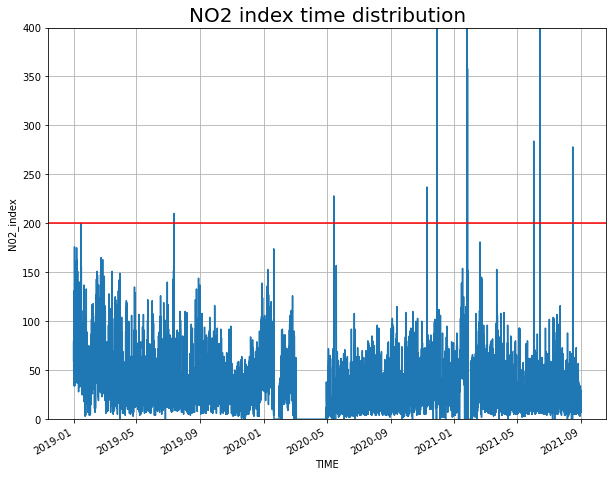

In [22]:
# Plotting  N02 index from POC dataset
plot = poc_air_index8_4['NO2_index'].plot(figsize=(10, 8))
plt.ylim(0,400)
plt.ylabel("N02_index", fontsize=10)
plt.xlabel("TIME", fontsize=10)
plt.title ("NO2 index time distribution", fontsize=20)
plt.grid()
plt.axhline(y=200, c='r')

In [25]:
import seaborn as sbn
sbn.set(rc={'figure.figsize':(10, 5)})

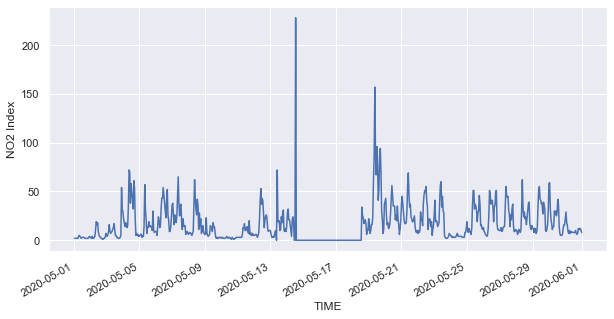

In [44]:
# Detailed plot to show the trend per specific month

year = poc_air_index8_4.loc['2020-05','NO2_index'].plot()
year.set_ylabel('NO2 Index');

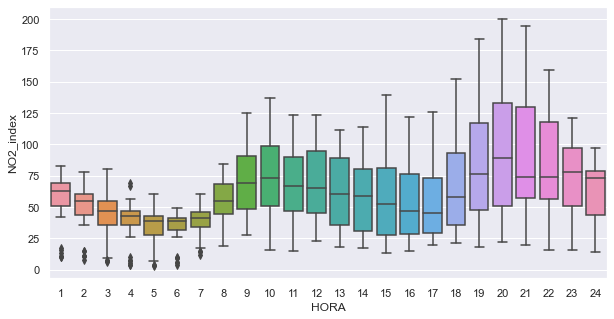

In [45]:
# N02 distribution  for each hour day
sbn.boxplot(data=poc_air_index8_4.loc['2019-01'], x='HORA', y='NO2_index');

## WEATHER MEASUREMENTS REFERENCE FILE

Data is gather in real time by different stations locations across several areas in Madrid city. Data is storage in multiple files, but they were consolidated in only one reference file. (This is explained in notebook "1b_Extract_Concat_Weather_measurement.ipynb").

 The study will use ".csv", which follow this data structure (similar to the AirQuality reference file)

PROVINCIA | MUNICIPIO | ESTACION | MAGNITUD | PUNTO DE MUESTREO | AÑO | MES | DIA | Hxx (dato horario) | Vxx (código de validacion)
:--------: | ------- | ------- | ------- | ------- | ------- | ------- | ------- | ------- | ------- 
28 | 079 | 004 | 01 | 28079004_1_38| 17 |07 | 01| 00005 | V 


**PROVINCIA.** Spanish province where the study is located. 28 belongs to Madrid

**MUNICIPIO.** Municipality where the study is located. 079 belongs to Madrid city

**ESTACION.** Measuring station. In Madrid there are 26 stations across all the districts.Some of them are measuring also AirQuality.

**MAGNITUD.** Every station measure different parameters related to air quality. Below is the list of Magnitud and metric measured:

    80 -> Ultraviolet radiation (MW/m2)
    
    81 -> Wind speed (m/s)
    
    82 -> Wind direction
    
    83 -> Temperature (ºC)
    
    86 -> Humidity (%)
    
    87 -> Barometric pressure (mb)
    
    88 -> Solar radiation (W/m2)
    
    89 -> Water precipitation (l/m2)

**PUNTO DE MUESTREO.** This is a code including the station id (including provincia, municipio y estacion), and adding the "magnitud" and "tecnica de muestreo".

**Hxx (dato horario).** Data value per hour.

**Vxx (codigo de validacion).** Flag to identify the valid measurements, filtering out others that may have some issue during the measurement process. So, __the only valid values have a "V" in this field.__

**H01/VO1, H02/V02.** There are 48 extra columns related to hour (H01 = 1:00 am, H02 = 2:00 am..) and validation (V01 = data flag related to the data aat 1:00 am...). NOTE. For practical reason in the analyis the representation of the hours have been modified 1 second, just to allow reference the H24 to the same date. This is just matter of data representation not altering any result in the analysis.

In [5]:
#Creating dataframe with all data from the reference Weather file.

weather_index = pd.read_csv ("../data/interim/Weather/ref_weather.csv", sep= ',')
weather_index.head()

,Unnamed: 0,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,...,V20,H21,V21,H22,V22,H23,V23,H24,V24,source_file
0,0,28,79,102,81,28079102_81_98,2021,5,1,0.97,...,V,1.37,V,0.93,V,0.85,V,1.10,V,may_meteo21.csv
1,1,28,79,102,81,28079102_81_98,2021,5,2,2.23,...,V,1.93,V,2.12,V,1.70,V,2.57,V,may_meteo21.csv
2,2,28,79,102,81,28079102_81_98,2021,5,3,2.70,...,V,1.27,V,2.60,V,1.92,V,2.75,V,may_meteo21.csv
3,3,28,79,102,81,28079102_81_98,2021,5,4,2.25,...,V,1.57,V,1.67,V,0.75,V,0.38,V,may_meteo21.csv
4,4,28,79,102,81,28079102_81_98,2021,5,5,1.00,...,V,1.62,V,1.57,V,1.18,V,0.68,V,may_meteo21.csv


In [12]:
#Checking null values

weather_index.isnull().sum()

Unnamed: 0        0
PROVINCIA         0
MUNICIPIO         0
ESTACION          0
MAGNITUD          0
PUNTO_MUESTREO    0
ANO               0
MES               0
DIA               0
H01               0
V01               0
H02               0
V02               0
H03               0
V03               0
H04               0
V04               0
H05               0
V05               0
H06               0
V06               0
H07               0
V07               0
H08               0
V08               0
H09               0
V09               0
H10               0
V10               0
H11               0
V11               0
H12               0
V12               0
H13               0
V13               0
H14               0
V14               0
H15               0
V15               0
H16               0
V16               0
H17               0
V17               0
H18               0
V18               0
H19               0
V19               0
H20               0
V20               0
H21               0


**CONCLUSION:No NaNs in the data**

"Vxx" fields can contain N, what means that value related to that hour is not valid. So, as part of the cleaning and data transformation a deeper analysis will be needed to take a decision about the relevance of those values and impact in the final predicion, just to decide to clean this data from all stations or not.

In [13]:
#Checking volumes of not valid measurements (with N in Vxx fields)
weather_index_matrix= weather_index[['V01','V02','V03','V04','V05','V06','V07','V08','V09','V10','V11','V12','V13','V14', 'V15','V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24']].apply(pd.Series.value_counts)

In [14]:
weather_index_transpose = weather_index_matrix.transpose()
weather_index_transpose

,V,N
V01,86977,624
V02,86989,612
V03,86664,937
V04,86894,707
V05,86925,676
V06,86935,666
V07,86938,663
V08,86921,680
V09,86862,739
V10,86624,977


In [15]:
weather_index_transpose.sum()

V    2082480
N      19944
dtype: int64

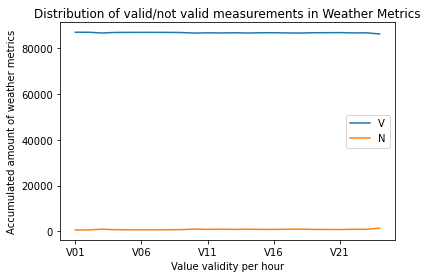

In [16]:
weather_index_transpose.plot()
plt.ylabel("Accumulated amount of weather metrics");
plt.xlabel("Value validity per hour");
plt.title("Distribution of valid/not valid measurements in Weather Metrics");

**CONCLUSION: Not valid values are around  1%, so the potential impact in the models should not be relevant. During next iteration the importance of this will be re-evaluated.**

The current data structure is not optimal for the analyis, so different transformation steps are going to be done.

1. Creation of TimeStamp just looking to simplify the data structure to something better to read. This is done with the function "to_datetime", concatenating the 3 fields in the original data in a date.https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

In [8]:
# Creation of a "DATE" field with the concatenation of ANO, MES & DIA
weather_index ['DATE'] = pd.to_datetime({'year': weather_index['ANO'],
                                                          'month': weather_index['MES'],
                                                          'day': weather_index['DIA']})

In [9]:
weather_index.head()

,Unnamed: 0,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,...,H21,V21,H22,V22,H23,V23,H24,V24,source_file,DATE
0,0,28,79,102,81,28079102_81_98,2021,5,1,0.97,...,1.37,V,0.93,V,0.85,V,1.10,V,may_meteo21.csv,2021-05-01
1,1,28,79,102,81,28079102_81_98,2021,5,2,2.23,...,1.93,V,2.12,V,1.70,V,2.57,V,may_meteo21.csv,2021-05-02
2,2,28,79,102,81,28079102_81_98,2021,5,3,2.70,...,1.27,V,2.60,V,1.92,V,2.75,V,may_meteo21.csv,2021-05-03
3,3,28,79,102,81,28079102_81_98,2021,5,4,2.25,...,1.57,V,1.67,V,0.75,V,0.38,V,may_meteo21.csv,2021-05-04
4,4,28,79,102,81,28079102_81_98,2021,5,5,1.00,...,1.62,V,1.57,V,1.18,V,0.68,V,may_meteo21.csv,2021-05-05


2.Hour information is storage in multiple columns, one per hour. This is not practical to manage the dataset, so a second transformation step has been done using "wide to long" concept, using "melt" function from pandas. This function is useful to massage a DataFrame into a format where one or more columns are identifier variables (id_vars), while all other columns, considered measured variables (value_vars), are “unpivoted” to the row axis, leaving just two non-identifier columns, ‘variable’ and ‘value’
https://pandas.pydata.org/docs/reference/api/pandas.melt.html#pandas.melt

In [10]:
# Dataframe transformation, keeping needed data and creating measured variables originally in columns

weather_index = pd.melt(weather_index, id_vars=['ESTACION', 'MAGNITUD', 'PUNTO_MUESTREO','DATE'], value_vars=['H01', 'H02', 'H03', 'H04', 'H05',
                                                                                                'H06', 'H07', 'H08', 'H09', 'H10',
                                                                                                'H11', 'H12', 'H13', 'H14', 'H15',
                                                                                                'H16', 'H17', 'H18', 'H19', 'H20',
                                                                                                'H21', 'H22', 'H23', 'H24'])

In [11]:
weather_index

,ESTACION,MAGNITUD,PUNTO_MUESTREO,DATE,variable,value
0,102,81,28079102_81_98,2021-05-01,H01,0.97
1,102,81,28079102_81_98,2021-05-02,H01,2.23
2,102,81,28079102_81_98,2021-05-03,H01,2.70
3,102,81,28079102_81_98,2021-05-04,H01,2.25
4,102,81,28079102_81_98,2021-05-05,H01,1.00
...,...,...,...,...,...,...
2102419,59,89,28079059_89_98,2019-03-27,H24,0.00
2102420,59,89,28079059_89_98,2019-03-28,H24,0.00
2102421,59,89,28079059_89_98,2019-03-29,H24,0.00
2102422,59,89,28079059_89_98,2019-03-30,H24,0.00


3. Stil data require some other transformation to allow us manipulate and visualize it properly, it requires to transform the "variables" from columns created with melt function together with the date to create a Timestamp field, what will facilitate us the data manipulation.

In [12]:
#Creation of HORA field based on the hourly columns manipulated with melt funcion and now storage in "variable" field

weather_index['HORA'] = [int(x[1:3]) for x in weather_index.variable.values]

In [13]:
weather_index.head()

,ESTACION,MAGNITUD,PUNTO_MUESTREO,DATE,variable,value,HORA
0,102,81,28079102_81_98,2021-05-01,H01,0.97,1
1,102,81,28079102_81_98,2021-05-02,H01,2.23,1
2,102,81,28079102_81_98,2021-05-03,H01,2.70,1
3,102,81,28079102_81_98,2021-05-04,H01,2.25,1
4,102,81,28079102_81_98,2021-05-05,H01,1.00,1


4. Creation of timestamp and indexing

In [14]:
#Creation of timestamp field & indexing time

weather_index['TIME'] = weather_index['DATE'].astype(str) + ' ' + (weather_index['HORA']-1).astype(str) + ':59:59'
weather_index['TIME']=pd.to_datetime(weather_index['TIME'] )


In [15]:
weather_index.head()

,ESTACION,MAGNITUD,PUNTO_MUESTREO,DATE,variable,value,HORA,TIME
0,102,81,28079102_81_98,2021-05-01,H01,0.97,1,2021-05-01 00:59:59
1,102,81,28079102_81_98,2021-05-02,H01,2.23,1,2021-05-02 00:59:59
2,102,81,28079102_81_98,2021-05-03,H01,2.70,1,2021-05-03 00:59:59
3,102,81,28079102_81_98,2021-05-04,H01,2.25,1,2021-05-04 00:59:59
4,102,81,28079102_81_98,2021-05-05,H01,1.00,1,2021-05-05 00:59:59


5. Cleaning not needed columns and rename other columns to be more intuitive name.

In [16]:
# Cleaning and rename columns
weather_index.drop(['variable'], axis = 'columns', inplace=True)
weather_index = weather_index[["ESTACION", "MAGNITUD","PUNTO_MUESTREO", "TIME", "DATE", "HORA", "value"]]
weather_index.rename(columns={'ESTACION':'WEATHER_STATION_ID'},inplace=True)
weather_index.rename(columns={'PUNTO_MUESTREO':'WEATHER_METRIC_POINT'},inplace=True)
weather_index.head()

,WEATHER_STATION_ID,MAGNITUD,WEATHER_METRIC_POINT,TIME,DATE,HORA,value
0,102,81,28079102_81_98,2021-05-01 00:59:59,2021-05-01,1,0.97
1,102,81,28079102_81_98,2021-05-02 00:59:59,2021-05-02,1,2.23
2,102,81,28079102_81_98,2021-05-03 00:59:59,2021-05-03,1,2.70
3,102,81,28079102_81_98,2021-05-04 00:59:59,2021-05-04,1,2.25
4,102,81,28079102_81_98,2021-05-05 00:59:59,2021-05-05,1,1.00


6. Weather metric data contains multiple parameters defined per "MAGNITUD" field so it is needed to pivot the table to organize data in more readable data.

In [17]:
# Moving different magnitud values from "long to wide"
weather_index = weather_index.pivot_table(index=["TIME", "WEATHER_STATION_ID"], columns='MAGNITUD', values='value').reset_index()
weather_index.reset_index(inplace=True, drop=True)
weather_index.columns.name = None

In [18]:
weather_index.head()

,TIME,WEATHER_STATION_ID,80,81,82,83,86,87,88,89
0,2019-01-01 00:59:59,4,NaN,NaN,NaN,1.1,NaN,NaN,NaN,NaN
1,2019-01-01 00:59:59,8,NaN,NaN,NaN,6.9,50.0,NaN,NaN,NaN
2,2019-01-01 00:59:59,16,NaN,NaN,NaN,NaN,57.0,NaN,NaN,NaN
3,2019-01-01 00:59:59,18,NaN,NaN,NaN,2.3,NaN,NaN,NaN,NaN
4,2019-01-01 00:59:59,24,1.0,0.59,22.0,-0.4,85.0,957.0,1.0,0.0


In [19]:
#Rename column parameters created from pivot data, from MAGNITUD code to Parameter
weather_index.rename(columns={80:'UV'},inplace=True)
weather_index.rename(columns={81:'WindSpeed'},inplace=True)
weather_index.rename(columns={82:'DirectionSpeed'},inplace=True)
weather_index.rename(columns={83:'Temperature'},inplace=True)
weather_index.rename(columns={86:'Humidity'},inplace=True)
weather_index.rename(columns={87:'BarPressure'},inplace=True)
weather_index.rename(columns={88:'SolarRadiation'},inplace=True)
weather_index.rename(columns={89:'Precipitation'},inplace=True)

In [20]:
weather_index.head()

,TIME,WEATHER_STATION_ID,UV,WindSpeed,DirectionSpeed,Temperature,Humidity,BarPressure,SolarRadiation,Precipitation
0,2019-01-01 00:59:59,4,NaN,NaN,NaN,1.1,NaN,NaN,NaN,NaN
1,2019-01-01 00:59:59,8,NaN,NaN,NaN,6.9,50.0,NaN,NaN,NaN
2,2019-01-01 00:59:59,16,NaN,NaN,NaN,NaN,57.0,NaN,NaN,NaN
3,2019-01-01 00:59:59,18,NaN,NaN,NaN,2.3,NaN,NaN,NaN,NaN
4,2019-01-01 00:59:59,24,1.0,0.59,22.0,-0.4,85.0,957.0,1.0,0.0



**TRANSFORMATION WEATHER DATA - CODE SUMMARY** 

In [6]:
# Creation of a "DATE" field with the concatenation of ANO, MES & DIA
weather_index ['DATE'] = pd.to_datetime({'year': weather_index['ANO'],
                                                          'month': weather_index['MES'],
                                                          'day': weather_index['DIA']})

# Dataframe transformation, keeping needed data and creating measured variables originally in columns
weather_index = pd.melt(weather_index, id_vars=['ESTACION', 'MAGNITUD', 'PUNTO_MUESTREO','DATE'], value_vars=['H01', 'H02', 'H03', 'H04', 'H05',
                                                                                                'H06', 'H07', 'H08', 'H09', 'H10',
                                                                                                'H11', 'H12', 'H13', 'H14', 'H15',
                                                                                                'H16', 'H17', 'H18', 'H19', 'H20',
                                                                                                'H21', 'H22', 'H23', 'H24'])

#Creation of HORA field based on the hourly columns manipulated with melt funcion and now storage in "variable" field
weather_index['HORA'] = [int(x[1:3]) for x in weather_index.variable.values]

#Creation of timestamp field & indexing time
weather_index['TIME'] = weather_index['DATE'].astype(str) + ' ' + (weather_index['HORA']-1).astype(str) + ':59:59'
weather_index['TIME']=pd.to_datetime(weather_index['TIME'] )

# Cleaning and rename columns
weather_index.drop(['variable'], axis = 'columns', inplace=True)
weather_index = weather_index[["ESTACION", "MAGNITUD","PUNTO_MUESTREO", "TIME", "DATE", "HORA", "value"]]
weather_index.rename(columns={'ESTACION':'WEATHER_STATION_ID'},inplace=True)
weather_index.rename(columns={'PUNTO_MUESTREO':'WEATHER_METRIC_POINT'},inplace=True)

# Moving different magnitud values from "long to wide"
weather_index = weather_index.pivot_table(index=["TIME", "WEATHER_STATION_ID"], columns='MAGNITUD', values='value').reset_index()
weather_index.reset_index(inplace=True, drop=True)
weather_index.columns.name = None

#Rename column parameters created from pivot
weather_index.rename(columns={80:'UV'},inplace=True)
weather_index.rename(columns={81:'WindSpeed'},inplace=True)
weather_index.rename(columns={82:'DirectionSpeed'},inplace=True)
weather_index.rename(columns={83:'Temperature'},inplace=True)
weather_index.rename(columns={86:'Humidity'},inplace=True)
weather_index.rename(columns={87:'BarPressure'},inplace=True)
weather_index.rename(columns={88:'SolarRadiation'},inplace=True)
weather_index.rename(columns={89:'Precipitation'},inplace=True)



In [7]:
weather_index.head()

,TIME,WEATHER_STATION_ID,UV,WindSpeed,DirectionSpeed,Temperature,Humidity,BarPressure,SolarRadiation,Precipitation
0,2019-01-01 00:59:59,4,NaN,NaN,NaN,1.1,NaN,NaN,NaN,NaN
1,2019-01-01 00:59:59,8,NaN,NaN,NaN,6.9,50.0,NaN,NaN,NaN
2,2019-01-01 00:59:59,16,NaN,NaN,NaN,NaN,57.0,NaN,NaN,NaN
3,2019-01-01 00:59:59,18,NaN,NaN,NaN,2.3,NaN,NaN,NaN,NaN
4,2019-01-01 00:59:59,24,1.0,0.59,22.0,-0.4,85.0,957.0,1.0,0.0


### CREATING POC DATASET (Weather Data)

In previous step POC dataset related to AirQuality Station #4 has been created. Weather metrics related to WeatherStation associate to the POC AirQuality station need to be added

This spatial analysis has been done in notebook "2_Geo inclufence weather station per air quality station.ipynb". This spatial analyis done identify that the closer Weather station for AirStation #4 is related to Weather station #4. (in this case is the same.

In [23]:
#Checking Reference file to link Weather station to Air Quality station

Ref = pd.read_csv ("../data/interim/Ref_file_WeatherStations4AirStations.csv", sep= ',')
Ref.rename(columns={'WeatherStationCode':'WEATHER_STATION_ID'},inplace=True)
Ref.rename(columns={'AirStationCode':'AIR_STATION_ID'},inplace=True)
Ref.head()

,WEATHER_STATION_ID,AIR_STATION_ID
0,4,4
1,8,8
2,16,16
3,18,18
4,24,24


In [25]:

poc_weather_index_4 = weather_index[(weather_index['WEATHER_STATION_ID'] == 4) ]

In [26]:
poc_weather_index_4.head()

,TIME,WEATHER_STATION_ID,UV,WindSpeed,DirectionSpeed,Temperature,Humidity,BarPressure,SolarRadiation,Precipitation
0,2019-01-01 00:59:59,4,NaN,NaN,NaN,1.1,NaN,NaN,NaN,NaN
26,2019-01-01 01:59:59,4,NaN,NaN,NaN,0.4,NaN,NaN,NaN,NaN
52,2019-01-01 02:59:59,4,NaN,NaN,NaN,-0.1,NaN,NaN,NaN,NaN
78,2019-01-01 03:59:59,4,NaN,NaN,NaN,-0.5,NaN,NaN,NaN,NaN
104,2019-01-01 04:59:59,4,NaN,NaN,NaN,-0.9,NaN,NaN,NaN,NaN


In [13]:
poc_weather_index_4.shape


(21120, 10)

In [29]:
DB=pd.merge(weather_index, Ref, on='WEATHER_STATION_ID', how="left")
DB.head()

,TIME,WEATHER_STATION_ID,UV,WindSpeed,DirectionSpeed,Temperature,Humidity,BarPressure,SolarRadiation,Precipitation,AIR_STATION_ID
0,2019-01-01 00:59:59,4,NaN,NaN,NaN,1.1,NaN,NaN,NaN,NaN,4
1,2019-01-01 00:59:59,8,NaN,NaN,NaN,6.9,50.0,NaN,NaN,NaN,8
2,2019-01-01 00:59:59,16,NaN,NaN,NaN,NaN,57.0,NaN,NaN,NaN,16
3,2019-01-01 00:59:59,18,NaN,NaN,NaN,2.3,NaN,NaN,NaN,NaN,18
4,2019-01-01 00:59:59,24,1.0,0.59,22.0,-0.4,85.0,957.0,1.0,0.0,24


In [30]:
pd.merge(DB, air_index8, on=['AIR_STATION_ID','TIME'], how="left")

ValueError: 'TIME' is both an index level and a column label, which is ambiguous.

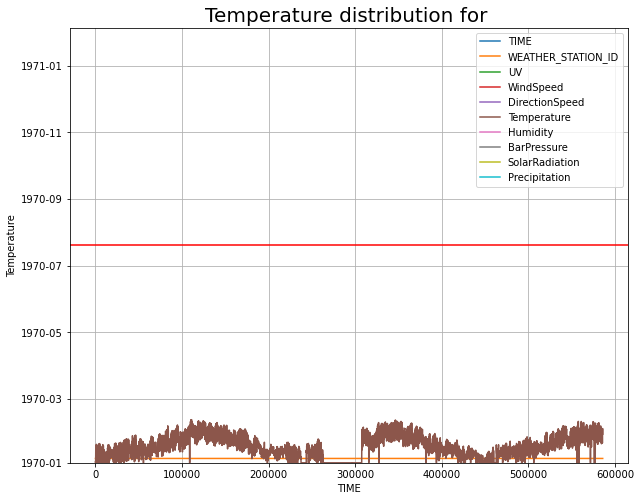

In [14]:
# Plotting  
plot = poc_weather_index_4.plot(figsize=(10, 8))
plt.ylim(0,400)
plt.ylabel("Temperature", fontsize=10)
plt.xlabel("TIME", fontsize=10)
plt.title ("Temperature distribution for ", fontsize=20)
plt.grid()
plt.axhline(y=200, c='r')
